In [6]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [9]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8,
                                   max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.7861111111111111
knn   :  0.8472222222222222
svm   :  0.8888888888888888


In [14]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[2.08571505e-04 3.40394593e-04 1.45667913e-04 1.42582927e-04
  2.05638835e-04 1.24890425e-04 6.62873265e-05 9.94847331e-01
  3.55615936e-03 3.62476329e-04]
 [2.73751454e-03 5.94708112e-02 1.09082386e-02 5.91872918e-03
  7.29642585e-03 1.20312431e-02 2.56301329e-03 2.22022808e-02
  8.65425780e-01 1.14459632e-02]]


In [17]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.8861111111111111

In [15]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8833333333333333

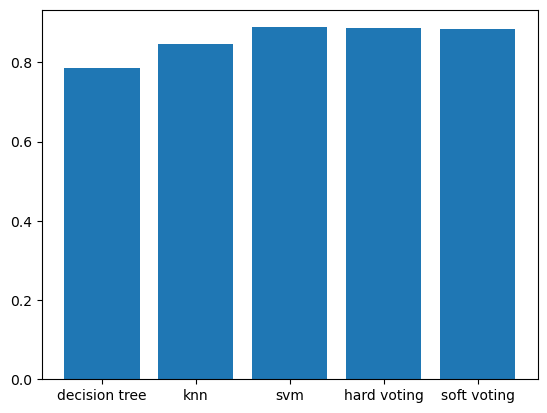

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])

plt.xticks(x, ['decision tree', 'knn', 'svm',
               'hard voting', 'soft voting']);